In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
! python3 -V

Python 3.9.13


In [3]:
!pip install Aspose.Email-for-Python-via-NET
!pip install scikit-learn
!pip install spacy
!pip install pandas

You should consider upgrading via the 'D:\ML-Labs\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\ML-Labs\venv\Scripts\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'D:\ML-Labs\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\ML-Labs\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
from aspose.email.storage.mbox import MboxStorageReader, MboxLoadOptions

In [5]:
import pandas as pd

Подготавливаем заголовки датафрейма:\
Type: 0 - ham; 1 - spam\
Id: понадобится для сохранения связи между обработанный письмом и его изначальной формой\
Text: содержание письма

In [6]:
data = {'Type':[],'Id':[] ,'Text':[]}
df = pd.DataFrame(data)
print(df)

Empty DataFrame
Columns: [Type, Id, Text]
Index: []


При помощи библеотеки aspose извлекаем содержание писем из .mbox файлов и заносим в датафрейм, сперва ham, затем spam\
Также создадим лист с email, чтобы в последующем можно было явно получить люое из писем для демонстрации его содержания

In [8]:
import os
mbox_load_options = MboxLoadOptions()
mbox_load_options.leave_open = False
mbox_load_options.preferred_text_encoding = 'utf-8'
email_list=[]
dir_name=("stud_lab_dataset\ham")
c=0
directory = os.fsencode(dir_name)
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    with MboxStorageReader.create_reader(dir_name+"\\"+filename, mbox_load_options) as mbox_reader:
       for eml in mbox_reader.enumerate_messages():
           c+=1
           print(filename,c) 
           df.loc[ len(df.index )] = [0,c,eml.body[195:]]
           email_list.append(eml)

dir_name=("stud_lab_dataset\spam")
directory = os.fsencode(dir_name)
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    with MboxStorageReader.create_reader(dir_name+"\\"+filename, mbox_load_options) as mbox_reader:
       for eml in mbox_reader.enumerate_messages():
           c+=1
           print(filename,c) 
           df.loc[ len(df.index )] = [1,c,eml.body[195:]]
           email_list.append(eml)

0001.ea7e79d3153e7469e7a9c3e0af6a357e 1
0002.b3120c4bcbf3101e661161ee7efcb8bf 2
0003.acfc5ad94bbd27118a0d8685d18c89dd 3
0004.e8d5727378ddde5c3be181df593f1712 4
0005.8c3b9e9c0f3f183ddaf7592a11b99957 5
0006.ee8b0dba12856155222be180ba122058 6
0007.c75188382f64b090022fa3b095b020b0 7
0008.20bc0b4ba2d99aae1c7098069f611a9b 8
0009.435ae292d75abb1ca492dcc2d5cf1570 9
0010.4996141de3f21e858c22f88231a9f463 10
0011.07b11073b53634cff892a7988289a72e 11
0012.d354b2d2f24d1036caf1374dd94f4c94 12
0013.ff597adee000d073ae72200b0af00cd1 13
0014.532e0a17d0674ba7a9baa7b0afe5fb52 14
0015.a9ff8d7550759f6ab62cc200bdf156e7 15
0016.d82758030e304d41fb3f4ebbb7d9dd91 16
0017.d81093a2182fc9135df6d9158a8ebfd6 17
0018.ba70ecbeea6f427b951067f34e23bae6 18
0019.a8a1b2767e83b3be653e4af0148e1897 19
0020.ef397cef16f8041242e3b6560e168053 20
0021.f8e73bdba7277d967af4d561f0402129 21
0022.7241da4491c49b50c0470a3638ee35c4 22
0023.b4a61a2990263e8825246e41a8d78399 23
0024.771af861a302951df7630ec4ff1965a2 24
0025.64d0382de54b9e4c5b42

In [9]:
len(email_list)

3591

In [10]:
df.head(20)

,Type,Id,Text
0,0,1,"Date: Wed, 21 Aug 2002 10:54:46 -05..."
1,0,2,"Martin A posted:\nTassos Papadopoulos, the Gre..."
2,0,3,Man Threatens Explosion In Moscow \n\nThursday...
3,0,4,Klez: The Virus That Won't Die\n \nAlready the...
4,0,5,"On Wed Aug 21 2002 at 15:46, Ulises Ponce wrot..."
5,0,6,"> in adding cream to spaghetti carbonara, whi..."
6,0,7,\n> I just had to jump in here as Carbonara is...
7,0,8,The Scotsman - 22 August 2002\n\n Playboy want...
8,0,9,Martin Adamson wrote:\n> \n> Isn't it just bas...
9,0,10,The Scotsman\n\n Thu 22 Aug 2002 \n\n Meaningf...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3591 entries, 0 to 3590
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Type    3591 non-null   int64 
 1   Id      3591 non-null   int64 
 2   Text    3591 non-null   object
dtypes: int64(2), object(1)
memory usage: 112.2+ KB


<font size = "3"> Можно заметить что итоговое значение строк меньше количесва файлов. Это связано с тем, что не во всех файлах удаётся обнаружить сообщение. В действительности, если сравнить файл, в котором сообщение обнаруживается, и файл, в котором нет, то разница по содержанию будет очевидна. Можно утверждать, что нечитаемые файлы, записаны некорректно и не могут быть прочитаны также как и остальные. Этими файлами допустимо пренебречь, так как их число составляет около 9% от общего числа, что не является значимой потерей.

<font size = "3"> Также уточню почему было принято решение обрабатывать файлы при помощи библеотеки, а не использовать их текстовое содержимое напрямую, несмотря на потерю части файлов. При исползовании тексттового содержимого в файле остаётся много лишней информации, а самое плохое - адресса получателя и отправителя. Если мы обратим внимание, то обнаружим что в даннй выборке они часто повторяются, при это адресса участвующие в spam и ham различны. Это означает, что если бы допустили то, что они также обрабатывались как и внутренние содержимое сообщение, то адреса или их части могли быть стать основными параметрами по которым модель бы делала предсказание, что является недопустимым

<AxesSubplot: >

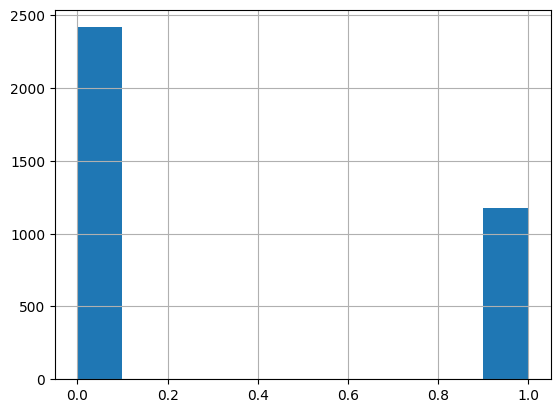

In [12]:
df.Type.hist()

<font size = "5">Из гистограммы делаем вывод, что балансировка классов не требуется

<font size = "5"> Далее преступаем к обработке текста, первым делом удалим лишние символы и приведём его в единообразный вид

In [13]:
import re

In [14]:
df['processed_text'] = df['Text'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x).lower())

In [15]:
df

,Type,Id,Text,processed_text
0,0,1,"Date: Wed, 21 Aug 2002 10:54:46 -05...",date wed aug ...
1,0,2,"Martin A posted:\nTassos Papadopoulos, the Gre...",martin a posted tassos papadopoulos the gree...
2,0,3,Man Threatens Explosion In Moscow \n\nThursday...,man threatens explosion in moscow thursday a...
3,0,4,Klez: The Virus That Won't Die\n \nAlready the...,klez the virus that won t die already the m...
4,0,5,"On Wed Aug 21 2002 at 15:46, Ulises Ponce wrot...",on wed aug at ulises ponce wrot...
...,...,...,...,...
3586,1,3587,Did you hear? Interest rates have just been lo...,did you hear interest rates have just been lo...
3587,1,3588,______________________________\r\n\r\n\r\n \r\...,http ...
3588,1,3589,\t Preferred Non-Smoker\n \t\n Just what the ...,preferred non smoker just what the doct...
3589,1,3590,****Mid-Summer Customer Appreciation SALE!****...,mid summer customer appreciation sale ...


<font size = "5"> Произведём токенизацию документов

In [16]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [17]:
df['tockens'] = df['processed_text'].apply(lambda x: [token for token in nlp(x)])

In [18]:
df

,Type,Id,Text,processed_text,tockens
0,0,1,"Date: Wed, 21 Aug 2002 10:54:46 -05...",date wed aug ...,"[ , date, , we, d, , aug, ..."
1,0,2,"Martin A posted:\nTassos Papadopoulos, the Gre...",martin a posted tassos papadopoulos the gree...,"[martin, a, posted, , tassos, papadopoulos, ..."
2,0,3,Man Threatens Explosion In Moscow \n\nThursday...,man threatens explosion in moscow thursday a...,"[man, threatens, explosion, in, moscow, , th..."
3,0,4,Klez: The Virus That Won't Die\n \nAlready the...,klez the virus that won t die already the m...,"[klez, , the, virus, that, won, t, die, , a..."
4,0,5,"On Wed Aug 21 2002 at 15:46, Ulises Ponce wrot...",on wed aug at ulises ponce wrot...,"[on, we, d, aug, , at, , ulises..."
...,...,...,...,...,...
3586,1,3587,Did you hear? Interest rates have just been lo...,did you hear interest rates have just been lo...,"[did, you, hear, , interest, rates, have, jus..."
3587,1,3588,______________________________\r\n\r\n\r\n \r\...,http ...,"[ , htt..."
3588,1,3589,\t Preferred Non-Smoker\n \t\n Just what the ...,preferred non smoker just what the doct...,"[ , preferred, non, smoker, , just, what..."
3589,1,3590,****Mid-Summer Customer Appreciation SALE!****...,mid summer customer appreciation sale ...,"[ , mid, summer, customer, appreciation, sa..."


<font size = "5"> Теперь удалим стоп-слова

In [19]:
stopwords = nlp.Defaults.stop_words

In [20]:
df['tockenlist'] = df['tockens'].apply(lambda x: [token for token in x if token.lower_  not in stopwords])

In [21]:
df

,Type,Id,Text,processed_text,tockens,tockenlist
0,0,1,"Date: Wed, 21 Aug 2002 10:54:46 -05...",date wed aug ...,"[ , date, , we, d, , aug, ...","[ , date, , d, , aug, ..."
1,0,2,"Martin A posted:\nTassos Papadopoulos, the Gre...",martin a posted tassos papadopoulos the gree...,"[martin, a, posted, , tassos, papadopoulos, ...","[martin, posted, , tassos, papadopoulos, , g..."
2,0,3,Man Threatens Explosion In Moscow \n\nThursday...,man threatens explosion in moscow thursday a...,"[man, threatens, explosion, in, moscow, , th...","[man, threatens, explosion, moscow, , thursd..."
3,0,4,Klez: The Virus That Won't Die\n \nAlready the...,klez the virus that won t die already the m...,"[klez, , the, virus, that, won, t, die, , a...","[klez, , virus, won, t, die, , prolific, vi..."
4,0,5,"On Wed Aug 21 2002 at 15:46, Ulises Ponce wrot...",on wed aug at ulises ponce wrot...,"[on, we, d, aug, , at, , ulises...","[d, aug, , , ulises, ponce, wro..."
...,...,...,...,...,...,...
3586,1,3587,Did you hear? Interest rates have just been lo...,did you hear interest rates have just been lo...,"[did, you, hear, , interest, rates, have, jus...","[hear, , interest, rates, lowered, , don, t,..."
3587,1,3588,______________________________\r\n\r\n\r\n \r\...,http ...,"[ , htt...","[ , htt..."
3588,1,3589,\t Preferred Non-Smoker\n \t\n Just what the ...,preferred non smoker just what the doct...,"[ , preferred, non, smoker, , just, what...","[ , preferred, non, smoker, , doctor, or..."
3589,1,3590,****Mid-Summer Customer Appreciation SALE!****...,mid summer customer appreciation sale ...,"[ , mid, summer, customer, appreciation, sa...","[ , mid, summer, customer, appreciation, sa..."


<font size = "5"> Производим лемматизацию

In [22]:
df['lem_tockenlist'] = df['tockenlist'].apply(lambda x: [token.lemma_ for token in x])

In [23]:
df

,Type,Id,Text,processed_text,tockens,tockenlist,lem_tockenlist
0,0,1,"Date: Wed, 21 Aug 2002 10:54:46 -05...",date wed aug ...,"[ , date, , we, d, , aug, ...","[ , date, , d, , aug, ...","[ , date, , d, , aug, ..."
1,0,2,"Martin A posted:\nTassos Papadopoulos, the Gre...",martin a posted tassos papadopoulos the gree...,"[martin, a, posted, , tassos, papadopoulos, ...","[martin, posted, , tassos, papadopoulos, , g...","[martin, post, , tassos, papadopoulo, , gree..."
2,0,3,Man Threatens Explosion In Moscow \n\nThursday...,man threatens explosion in moscow thursday a...,"[man, threatens, explosion, in, moscow, , th...","[man, threatens, explosion, moscow, , thursd...","[man, threaten, explosion, moscow, , thursda..."
3,0,4,Klez: The Virus That Won't Die\n \nAlready the...,klez the virus that won t die already the m...,"[klez, , the, virus, that, won, t, die, , a...","[klez, , virus, won, t, die, , prolific, vi...","[klez, , virus, win, t, die, , prolific, vi..."
4,0,5,"On Wed Aug 21 2002 at 15:46, Ulises Ponce wrot...",on wed aug at ulises ponce wrot...,"[on, we, d, aug, , at, , ulises...","[d, aug, , , ulises, ponce, wro...","[d, aug, , , ulise, ponce, writ..."
...,...,...,...,...,...,...,...
3586,1,3587,Did you hear? Interest rates have just been lo...,did you hear interest rates have just been lo...,"[did, you, hear, , interest, rates, have, jus...","[hear, , interest, rates, lowered, , don, t,...","[hear, , interest, rate, lower, , don, t, de..."
3587,1,3588,______________________________\r\n\r\n\r\n \r\...,http ...,"[ , htt...","[ , htt...","[ , htt..."
3588,1,3589,\t Preferred Non-Smoker\n \t\n Just what the ...,preferred non smoker just what the doct...,"[ , preferred, non, smoker, , just, what...","[ , preferred, non, smoker, , doctor, or...","[ , prefer, non, smoker, , doctor, order..."
3589,1,3590,****Mid-Summer Customer Appreciation SALE!****...,mid summer customer appreciation sale ...,"[ , mid, summer, customer, appreciation, sa...","[ , mid, summer, customer, appreciation, sa...","[ , mid, summer, customer, appreciation, sa..."


<font size = "5"> Теперь произведём векторизацию при помощи TF-IDF, будем учитывать n-граммы от 1 до 4, а также будем исключать из внимания n-граммы, которые встречаются менее 5 раз

In [24]:
strings = []
for i in df['lem_tockenlist']:
    text =' '.join([str(row) for row in i])
    strings.append(text)

In [25]:
strings

['     date          d      aug                                   chris garrigues   cwg date               fa d deepeddy com       message d                     tmda deepeddy vircio com         t reproduce error    repeatable      like time   fail     debug log pick happen                pick   exec pick   inbox   list   lbrace   lbrace   subject ftp   rbrace   rbrace               sequence mercury            exec pick   inbox   list   lbrace   lbrace   subject ftp   rbrace   rbrace             sequence mercury           ftoc pickmsgs      hit             mark    hit           tkerror   syntax error expression   int       note   run pick command hand       delta   pick   inbox   list   lbrace   lbrace   subject ftp   rbrace   rbrace              sequence mercury    hit   s     hit   come   obviously     version nmh m       delta   pick   version pick     nmh         compile fuchsia cs mu oz au sun mar              ict         relevant   mh profile       delta   mhparam pick   seq sel  

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,4),min_df=5)
tfidf = tfidf_vectorizer.fit_transform(strings)
tfidf_vectorizer.vocabulary_

{'date': 8293,
 'aug': 2177,
 'chris': 5164,
 'garrigues': 14236,
 'cwg': 8041,
 'fa': 12169,
 'deepeddy': 8689,
 'com': 5789,
 'message': 22402,
 'tmda': 36574,
 'vircio': 38417,
 'reproduce': 30050,
 'error': 11457,
 'like': 20053,
 'time': 36248,
 'fail': 12263,
 'debug': 8606,
 'log': 20819,
 'pick': 26565,
 'happen': 15219,
 'exec': 11791,
 'inbox': 17178,
 'list': 20349,
 'subject': 34459,
 'ftp': 14087,
 'sequence': 31972,
 'mercury': 22391,
 'ftoc': 14084,
 'hit': 15861,
 'mark': 21907,
 'syntax': 35039,
 'expression': 12040,
 'int': 18075,
 'note': 24432,
 'run': 30852,
 'command': 6415,
 'hand': 15188,
 'delta': 8804,
 'come': 6350,
 'obviously': 24644,
 'version': 38297,
 'nmh': 24293,
 'compile': 6724,
 'cs': 7858,
 'oz': 25557,
 'au': 2164,
 'sun': 34707,
 'relevant': 29547,
 'mh': 22602,
 'profile': 27901,
 'seq': 31967,
 'sel': 31572,
 'work': 39542,
 'actually': 358,
 'explicit': 11990,
 'line': 20171,
 'search': 31324,
 'popup': 26998,
 'create': 7717,
 'kre': 19365,
 

In [28]:
tfidf.shape

(3591, 40620)

<font size = "3"> Теперь следует отобрать число признаков, на основании которы мы в будущем будем делать предсказания, в качестве базового классификатора возьмём NB

In [29]:
from sklearn.feature_selection import SelectKBest

In [30]:
Y=df['Type']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [32]:
number_of_features=[50,100,200,300,500,700,1000,1500,2000,2500,3000]
count=[0,0,0,0,0,0,0,0,0,0,0]
for ind,i in enumerate(number_of_features):
    for t in range(10):
        skb = SelectKBest(k=i)
        X_td = skb.fit_transform(tfidf,Y)
        x_train_td, x_test_td, y_train_td, y_test_td = train_test_split(X_td, Y, test_size=0.2)
        gnb = GaussianNB()
        gnb.fit(x_train_td.toarray(),y_train_td)
        y_pred = gnb.predict(x_test_td.toarray())
        count[ind]+=accuracy_score(y_pred,y_test_td)
for i in range(len(count)):
    print(number_of_features[i],count[i])

50 9.05702364394993
100 9.176634214186372
200 9.146036161335187
300 9.296244784422809
500 9.40751043115438
700 9.475660639777468
1000 9.641168289290682
1500 9.592489568845618
2000 9.630041724617525
2500 9.698191933240611
3000 9.712100139082057


<font size = "3"> По результатам вычисления accuracy для моделей, обыченных на разном числе признаков с учётом различных обучающих выборок, сделаем вывод, что тенденция по увеличению качества модели чётко сохраняется только по возрастанию числа признаков до 1000. Логично предположить, что увеличение числа признаков выше 1000 сделает модель неоправданно сложной, потому остановимся на этом значении.

In [33]:
skb = SelectKBest(k=1000)
X_td = skb.fit_transform(tfidf,Y)

In [34]:
x_train_td, x_test_td, y_train_td, y_test_td,id_train_td,id_test_td = train_test_split(X_td, Y,df.Id, test_size=0.2)

<font size = "3">Определим качество NB, и будем рассматривать эти значения как базовые

In [35]:
gnb = GaussianNB()
gnb.fit(x_train_td.toarray(),y_train_td)
y_pred = gnb.predict(x_test_td.toarray())
print(classification_report(y_test_td, y_pred))
print(confusion_matrix(y_test_td, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       497
           1       0.97      0.90      0.93       222

    accuracy                           0.96       719
   macro avg       0.96      0.94      0.95       719
weighted avg       0.96      0.96      0.96       719

[[490   7]
 [ 22 200]]


<font size = "3">Попробуем использовать K-neighboors, при этом подобрав оптимальное число соседей для определения при помощи GridSearch

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_neighbors":[1,3,5,7]}
knn=GridSearchCV(KNeighborsClassifier(), parameters).fit(x_train_td, y_train_td)

In [38]:
print(knn.best_params_)
knn.fit(x_train_td.toarray(),y_train_td)
y_pred_td = knn.predict(x_test_td.toarray())
print(classification_report(y_test_td, y_pred_td))
print(confusion_matrix(y_test_td, y_pred_td))

{'n_neighbors': 1}
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       497
           1       0.95      0.86      0.90       222

    accuracy                           0.94       719
   macro avg       0.94      0.92      0.93       719
weighted avg       0.94      0.94      0.94       719

[[486  11]
 [ 31 191]]


<font size = "3">Заметим что K-neighboors не показал результаты лучше NB, хотя благодаря результату GridSearch можно сделать вывод о большой схожести представителей разных классов (или одного из этих классов, вероятно spam)

<font size = "3">Построим модель логистической регрессии

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
parameters = {
    'penalty':['l1', 'l2', 'elasticnet', None],
    'C': [0.1,0.5,1,5,10,50,100,200]}
clf = GridSearchCV(LogisticRegression(), parameters).fit(x_train_td, y_train_td)
print(clf.best_params_)

y_pred1 = clf.predict(x_test_td)
print(classification_report(y_test_td, y_pred1))
print(confusion_matrix(y_test_td, y_pred1))

{'C': 200, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       497
           1       0.98      0.95      0.96       222

    accuracy                           0.98       719
   macro avg       0.98      0.97      0.97       719
weighted avg       0.98      0.98      0.98       719

[[493   4]
 [ 12 210]]


<font size = "3"> Логистичексая регресиия показала результат превосходящий NB, но возможно решающие деревья и ансамбли позволят нам добится ещё большей точности

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
parameters0={'max_depth':[11,15,19,24,31,43,57]}

dtc = GridSearchCV(DecisionTreeClassifier(), parameters0).fit(x_train_td, y_train_td)

In [43]:
print(dtc.best_params_)

{'max_depth': 57}


In [44]:
y0_pred=dtc.predict(x_test_td)

In [45]:
print(classification_report(y0_pred,y_test_td))
print(confusion_matrix(y_test_td, y0_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       507
           1       0.90      0.94      0.92       212

    accuracy                           0.95       719
   macro avg       0.94      0.95      0.94       719
weighted avg       0.95      0.95      0.95       719

[[485  12]
 [ 22 200]]


<font size = "3">Ясно что одно дерево, даже внушительной глубины, не способно также точно предсказать класс, потому не задерживаясь переходим к ансамблям

In [46]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(n_estimators=20,max_features=300 ).fit(x_train_td, y_train_td)
y_bag_pred = bag.predict(x_test_td)
print(classification_report(y_bag_pred,y_test_td))
print(confusion_matrix(y_test_td, y_bag_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       513
           1       0.92      1.00      0.96       206

    accuracy                           0.97       719
   macro avg       0.96      0.98      0.97       719
weighted avg       0.98      0.97      0.98       719

[[496   1]
 [ 17 205]]


In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=25, learning_rate=1,  max_features=300, max_depth=50,random_state=0)
gbc.fit(x_train_td, y_train_td)
y_gbc_pred = gbc.predict(x_test_td)
print(classification_report(y_gbc_pred,y_test_td))
print(confusion_matrix(y_test_td, y_gbc_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       507
           1       0.94      0.98      0.96       212

    accuracy                           0.97       719
   macro avg       0.96      0.98      0.97       719
weighted avg       0.98      0.97      0.98       719

[[493   4]
 [ 14 208]]


<font size = "3">BaggingClassifier показал результат хуже Логистической регрессии, в то время как GradientBoostingClassifier дал нам почти такое же количество правильно определённых emailов, что и логистическая регрессия. Но выбирая из этих двух моделей, я отдам предпочтение логистической регрессии в силу большего значения recall, так как прочитать лишний раз спамовое сообщение - не так страшно как не получить нужное и полезное сообщение

<font size = "3"> Ниже представлена опция с помощью которой можно получить информацию о случайном письме из тестовой выборке, а также получить предсказание для него

In [48]:
from random import randint

In [49]:
random_number=randint(0,x_test_td.shape[0]-1)
id=id_test_td.iloc[random_number]
results=["ham","spam"]
print("From address:",email_list[id].from_address)
print("\nTo address:",email_list[id].to)
print("\nDate:",email_list[id].date)
print("\nMain title:\n",email_list[id].subject.replace("(Aspose.Email Evaluation)",""))
print("\nText:\n",email_list[id].body[195:])
prediction=clf.predict(x_test_td[random_number])
print("\n\nPrediction:",results[prediction[0]])
print("Actualy:",results[int(id/2416)])

From address: "Glynn Clements" <glynn.clements@virgin.net>

To address: "Yannick Gingras" <ygingras@ygingras.net>

Date: 2002-09-03 22:55:47+00:00

Main title:
 Re: Secure Sofware Key

Text:
 
Yannick Gingras wrote:

> > What do you mean by "CD-Key or the like" (I presume that "of" was a
> > typo)? And what do you mean by "unbreakable"?
> 
> "of" was a typo
> 
> Unbreakable would mean here that no one, even previously authorised entity, 
> could use the system without paying the periodic subscription fee.
> 
> > You need to be far more explicit about the problem which you wish to
> > solve, and about the constraints involved.
> 
> It could be an online system that work 95% offline but poll frequently an 
> offsite server.  No mass production CDs, maybe mass personalised d/l like Sun 
> JDK.
> 
> Nothing is fixed yet, we are looking at the way a software can be protected 
> from unauthorized utilisation.  
> 
> Is the use of "trusted hardware" really worth it ?

Answering that requires 